<a href="https://colab.research.google.com/github/khuyentran1401/Twitter/blob/master/Twitter_Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
from os import listdir
from os.path import isfile, join
import xml.etree.ElementTree as ET
import numpy as np
import nltk

In [0]:
!cp '/content/drive/My Drive/Colab Notebooks/NLP/Data (1)/Data.zip' 'Data.zip'

In [0]:
!unzip -qq Data.zip

In [0]:
path_train = '/content/Data/train/en'
path_test = '/content/Data/test/en'

In [0]:
files_train = [f for f in listdir(path_train) if isfile(join(path_train, f))]
files_test = [f for f in listdir(path_test) if isfile(join(path_test, f))]

In [9]:
for r in ET.parse(join(path_train,files_train[0])).getroot()[0]:
    print(r.text)

@EdwardYuen88 @NEWS1130 @postelsia @domoiscraving "Thunder Snow"!!! It's a real thing
@cqrcmp @LesliBoldt @VancouverPD @PortMoodyPD  would you wear flip flops in a blizzard or hiking boots at the beach! Need the right tires!!!
@mattlee980 @CKNW @TransLink probably be a shorter list to say what IS working!!!!
@NEWS1130 @NEWS1130Traffic thanks to you there too!! Along with the maintenance crews and the private snowplow operators
@120Sports he looks a little deflated
@icbc @BCRCMP @VancouverPD PASS on driving drunk and just RUN instead!!!! #seahawks  #Superbowl
@VancouverPD please tell me he goes code 3 for the delivery!!!!
@jillreports Jerry Dobrovolnycant even look people in the eye!!!! He's looking down and to the left, even he cant believe this BS
@Jesstrukker @DriveBC @TranBC @LMDRCMP SERIOUSLY! drivers need a warning not to do this!!! Also dont stick a fork i… https://t.co/HmtvoUoj8i
@nationalpost meanwhile in Canada......
@NEWS1130Traffic live look at the rest of Canada looking at 

In [0]:
#ET.parse converts the file into the tree
def convert_texts(path_train, files_train):
    
    doc = []
    for i in range(len(files_train)):
        #Append the tweets to the corresponding document
        try:
            doc1 =[r.text for r in ET.parse(join(path_train,files_train[i])).getroot()[0]]
            doc.append(' '.join(t for t in doc1))
        except:
            print(files_train[i])
    return doc

In [11]:
# list of train and text tweets
t_train = convert_texts(path_train, files_train)
t_test  = convert_texts(path_test, files_test)

truth.txt
truth.txt


# Get Labels 

In [0]:
#Need explanation
def get_labels(path, files):
    dic={}
    task=[[],[]]
    for e in open(join(path,'truth.txt')).read().split('\n'):
        d=e.split(':::')
        if(len(d)==3):
            dic.update({d[0]: d[1:]})
            task[0].append(d[1])
            task[1].append(d[2])
    task=[sorted(list(set(t))) for t in task]
    
    d_task = [{item:i for i, item in enumerate(t)} for t in task]
    labels=[[],[]]

    for e in files:
        try:
            ID=e[:-4]
            labels[0].append(d_task[0][dic[ID][0]])
            labels[1].append(d_task[1][dic[ID][1]])
        except:
            pass#print(e)
    print(d_task)
    return np.array(labels)


In [13]:
labels_train = get_labels(path_train, files_train)
labels_test  = get_labels(path_test , files_test)
labels_train.shape

[{'female': 0, 'male': 1}, {'australia': 0, 'canada': 1, 'great britain': 2, 'ireland': 3, 'new zealand': 4, 'united states': 5}]
[{'female': 0, 'male': 1}, {'australia': 0, 'canada': 1, 'great britain': 2, 'ireland': 3, 'new zealand': 4, 'united states': 5}]


(2, 3600)

In [14]:
labels_train[0]

array([1, 1, 0, ..., 0, 0, 0])

# Check distribution of data

<BarContainer object of 6 artists>

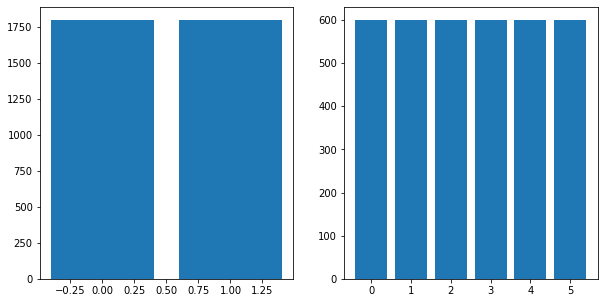

In [27]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

gender_num= Counter(labels_train[0])

nation_num = Counter(labels_train[1])

ax[0].bar(gender_num.keys(),gender_num.values())

ax[1].bar(nation_num.keys(), nation_num.values())


# Preprocessing

In [0]:
import re

replacement_patterns = [
    #match url (i.e: https://t.co/5tF5G9VKtq)
    (r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '<url>'),

    #match user (i.e: @cerpintor )
    (r'@\w+', '<user>'),

    #match hashtag (i.e: #WomensMarchOnWashington)
    (r'#\w+', '<hashtag>'),

    #Replace "&..." with ''
    (r'&\w+', '')
]

class RegexReplacer(object):
    def __init__(self, patterns = replacement_patterns):
        self.patterns = [(re.compile(regrex),repl) for (regrex, repl) in
                        patterns]
    
    #Replace the words that match the patterns with replacement words
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            s = re.sub(pattern, repl, s)
        return s

In [29]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

tknz = TweetTokenizer()
replacer = RegexReplacer()
stopwords = set(stopwords.words('english'))
punc = string.punctuation

def normalize(doc):
    
    for i in range(len(doc)):
        
        #Tokenize with replacement
        doc[i] = tknz.tokenize(replacer.replace(doc[i]))
        
        #Filter stopwords, punctuations, and lowercase
        doc[i] = [w.lower() for w in doc[i] if w not in punc and w not in stopwords]
    
        #Stem words
        
        lemmatizer = WordNetLemmatizer()
        
        doc[i] = [lemmatizer.lemmatize(w, pos='v') for w in doc[i]]
        
        
        #concat
        doc[i] = ' '.join(w for w in doc[i])
        
    return doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
nltk.download('wordnet')

t_train = normalize(t_train)
t_test =normalize(t_test)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [31]:
print(len(t_train))
print(len(t_test))

3600
2400


# Model Training

## Bag of Words

In [0]:
#Find Frequency of Words

corpus_tweet = []

for doc in t_train:
    corpus_tweet += doc.split()

fdist = nltk.FreqDist(corpus_tweet)


In [33]:
len(fdist)

104400

In [0]:
#Sort the dist by decreasing order
def sortFreqDist(freqdict):
    
    freq = [(freqdict[key], key) for key in freqdict]
    return sorted(freq, reverse = True)

In [0]:
#Pick 5000 most frequent words
freq_tweets = sortFreqDist(fdist)
freq_tweets = freq_tweets[:5000]

In [0]:
#index of frequent tweets
dict_indices = dict()
index = 0
for i, word in enumerate(freq_tweets):
    dict_indices[word[1]] = i
    

In [0]:
#Split the frequency and the frequent words
freq, freq_words = zip(*freq_tweets)

In [0]:
#Build a bag of words

import numpy as np

def build_bow_tr(t_train, freq_words, dict_indices):
    
    BOW = np.zeros((len(t_train), len(freq_tweets)), dtype=int)
    
    #Loop through documents
    for index, tr in enumerate(t_train):
        fdist_doc = nltk.FreqDist(tr.split())
        
        #Loop through the words in each document
        for word in fdist_doc:
            #If word in document is also in most frequenty words,
            #append the frequency of that word in BOW
            if word in freq_words:
                BOW[index, dict_indices[word]] = fdist_doc[word]
        
    return BOW

In [0]:
#BOW for training set
BOW_tr = build_bow_tr(t_train, freq_words, dict_indices)

In [47]:
# 3600 doc with 5000 words
BOW_tr.shape

(3600, 5000)

In [0]:
#BOW for test set
BOW_val = build_bow_tr(t_test, freq_words, dict_indices )

In [49]:
BOW_val.shape

(2400, 5000)

In [0]:
import csv
import argparse
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing
import numpy as np

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [66]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(BOW_tr,labels_train[0])

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_test[0], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[0], labels_pred))
print(metrics.classification_report(labels_test[0], labels_pred))


[[948 252]
 [317 883]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1200
           1       0.78      0.74      0.76      1200

    accuracy                           0.76      2400
   macro avg       0.76      0.76      0.76      2400
weighted avg       0.76      0.76      0.76      2400



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [67]:
metrics.accuracy_score(labels_test[0], labels_pred)

0.7629166666666667

In [68]:
grid.fit(BOW_tr,labels_train[1])

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_test[1], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[1], labels_pred))
print(metrics.classification_report(labels_test[1], labels_pred))


[[274  32  17  15  36  26]
 [ 22 300  11  14  16  37]
 [ 13  17 302  38  14  16]
 [ 14  12  33 311  14  16]
 [ 24   6  12   9 338  11]
 [ 17  45   9  10   8 311]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       400
           1       0.73      0.75      0.74       400
           2       0.79      0.76      0.77       400
           3       0.78      0.78      0.78       400
           4       0.79      0.84      0.82       400
           5       0.75      0.78      0.76       400

    accuracy                           0.77      2400
   macro avg       0.76      0.77      0.76      2400
weighted avg       0.76      0.77      0.76      2400



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [69]:
metrics.accuracy_score(labels_test[1], labels_pred)

0.765

## Tf-Idf


In [0]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 

#tf-idf
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

#just send in all your docs here
tfidf_vectorizer_train=tfidf_vectorizer.fit_transform(t_train)

tfidf_vectorizer_test=tfidf_vectorizer.transform(t_test)


In [51]:
tfidf_vectorizer_train.shape

(3600, 87879)

In [52]:
tfidf_vectorizer_test.shape

(2400, 87879)

In [97]:
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)
grid.fit(tfidf_vectorizer_train,labels_train[0])

labels_pred = grid.predict(tfidf_vectorizer_test)

print(confusion_matrix(labels_test[0], labels_pred))
print(metrics.classification_report(labels_test[0], labels_pred))



[[986 214]
 [268 932]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1200
           1       0.81      0.78      0.79      1200

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400



In [98]:
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)
grid.fit(tfidf_vectorizer_train,labels_train[1])

labels_pred = grid.predict(tfidf_vectorizer_test)

print(confusion_matrix(labels_test[1], labels_pred))
print(metrics.classification_report(labels_test[1], labels_pred))

[[331  22  12  12  13  10]
 [ 11 341  11   5   5  27]
 [ 15  12 319  29   7  18]
 [ 10   8  19 341   6  16]
 [ 13  12   6   0 361   8]
 [ 13  49   4   8   2 324]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       400
           1       0.77      0.85      0.81       400
           2       0.86      0.80      0.83       400
           3       0.86      0.85      0.86       400
           4       0.92      0.90      0.91       400
           5       0.80      0.81      0.81       400

    accuracy                           0.84      2400
   macro avg       0.84      0.84      0.84      2400
weighted avg       0.84      0.84      0.84      2400



### Observe the top predictors for gender

In [99]:
words = tfidf_vectorizer.get_feature_names()

param = grid.best_params_
print(param)

{'C': 1}


In [100]:
model = svm.LinearSVC(C=0.5)
model.fit(tfidf_vectorizer_train,labels_train[0])

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [101]:
words = tfidf_vectorizer.get_feature_names()

coef = model.coef_[0]
print(coef)

print(len(coef))

[ 0.44586398  0.46637798  0.01676969 ... -0.02122588 -0.02122588
 -0.02122588]
87879


In [0]:
relevant_words = [(words[idx], c) for idx, c in enumerate(coef)]
relevant_words.sort(key=lambda tup: abs(tup[1]), reverse=True)

In [103]:
relevant_words[:30]

[('women', -2.512906083980893),
 ('the', 1.963803638650628),
 ('yes', -1.7596620760344548),
 ('love', -1.7552801386111287),
 ('mate', 1.7011022965405227),
 ('game', 1.6458020632868293),
 ('woman', -1.592650728587865),
 ('oh', -1.5591681724535777),
 ('xx', -1.5572707279208098),
 ('cute', -1.5271511297755642),
 ('cry', -1.4699366724139873),
 ('excite', -1.456983903268716),
 ('sleep', -1.2884684101353758),
 ('lovely', -1.2821210904396552),
 ('play', 1.26030389187835),
 ('really', -1.254650616241157),
 ('miss', -1.250839818582233),
 ('hair', -1.237660256292277),
 ('heart', -1.229062389488758),
 ('fab', -1.2110858281726409),
 ('bro', 1.1999642190552147),
 ('years', 1.1952693305814233),
 ('thank', -1.1944741918875095),
 ('so', -1.1942900234427551),
 ('baby', -1.1915118728845113),
 ('husband', -1.18929562158052),
 ('good', 1.1846245658339651),
 ('okay', -1.1535620354291722),
 ('more', -1.1098077847121526),
 ('if', 1.1078181440644919)]

In [0]:
female = [w for w in relevant_words if w[1] < 0]
male= [w for w in relevant_words if w[1] >= 0]

In [105]:
female[:20]

[('women', -2.512906083980893),
 ('yes', -1.7596620760344548),
 ('love', -1.7552801386111287),
 ('woman', -1.592650728587865),
 ('oh', -1.5591681724535777),
 ('xx', -1.5572707279208098),
 ('cute', -1.5271511297755642),
 ('cry', -1.4699366724139873),
 ('excite', -1.456983903268716),
 ('sleep', -1.2884684101353758),
 ('lovely', -1.2821210904396552),
 ('really', -1.254650616241157),
 ('miss', -1.250839818582233),
 ('hair', -1.237660256292277),
 ('heart', -1.229062389488758),
 ('fab', -1.2110858281726409),
 ('thank', -1.1944741918875095),
 ('so', -1.1942900234427551),
 ('baby', -1.1915118728845113),
 ('husband', -1.18929562158052)]

In [106]:
male[:30]

[('the', 1.963803638650628),
 ('mate', 1.7011022965405227),
 ('game', 1.6458020632868293),
 ('play', 1.26030389187835),
 ('bro', 1.1999642190552147),
 ('years', 1.1952693305814233),
 ('good', 1.1846245658339651),
 ('if', 1.1078181440644919),
 ('man', 1.0952389148083865),
 ('seem', 1.0780162770947002),
 ('fuck', 1.015028575918658),
 ('last', 0.993512559744792),
 ('shit', 0.9840247652313816),
 ('gay', 0.9351371171772981),
 ('beer', 0.9145570070293533),
 ('team', 0.9091549116387223),
 ('apple', 0.8972397410645281),
 ('follow', 0.8875355841525543),
 ('gun', 0.8815137785917819),
 ('win', 0.8722040740999882),
 ('football', 0.8693537064288588),
 ('wife', 0.852673499786693),
 ('album', 0.8514597775653137),
 ('liberals', 0.8347467064895527),
 ('oppose', 0.812988764229935),
 ('fine', 0.8090474367105501),
 ('beat', 0.7971612147708605),
 ('bet', 0.7840320946978131),
 ('website', 0.7816895152790324),
 ('season', 0.774711633578332)]

## Word2Vec

In [0]:
import gensim
from gensim.models import KeyedVectors

In [81]:
from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile

'''

path_glove = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d.txt')
path_w2v = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d_w2v.txt')

'''

[Errno 2] No such file or directory: '/Users/khuyentran/Library/Mobile Documents/com~apple~CloudDocs/NLP/Twitter'
/content


"\n\npath_glove = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d.txt')\npath_w2v = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d_w2v.txt')\n\n"

In [0]:
"""
glove_file = datapath(path_glove)
tmp_file = get_tmpfile(path_w2v)

_ = glove2word2vec(glove_file, tmp_file)

"""
!cp '/content/drive/My Drive/Colab Notebooks/NLP/Data (1)/glove.twitter.27B.200d_w2v.txt' 'glove.twitter.27B.200d_w2v.txt'

In [83]:
path = os.path.abspath('/content/glove.twitter.27B.200d_w2v.txt')

model = KeyedVectors.load_word2vec_format(path, binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [84]:
model.most_similar(positive=['love'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('you', 0.8460860252380371),
 ('much', 0.7890045642852783),
 ('always', 0.7601683735847473),
 ('know', 0.7598055005073547),
 ('my', 0.7519949078559875),
 ('and', 0.7513089776039124),
 ('loves', 0.7512385845184326),
 ('life', 0.7443933486938477),
 ('it', 0.7426838874816895),
 ("n't", 0.7408115267753601)]

In [85]:
model.most_similar(positive=['boy','young'], negative=['girl'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('danny', 0.5829670429229736),
 ('kid', 0.5824101567268372),
 ('lil', 0.5818741321563721),
 ('boi', 0.5678704977035522),
 ('rich', 0.5601534843444824),
 ('joe', 0.5577762722969055),
 ('man', 0.556766927242279),
 ('wayne', 0.5450313091278076),
 ('jay', 0.5433350205421448),
 ('ace', 0.5393061637878418)]

In [0]:
#Build vector by taking the mean of the W2V vector of each word
def build_vector(t_train):
    
    w2v = []
    
    for doc in t_train:
                   
        mean = 0
        count = 0
        for word in doc.split():
            try:
                mean += model[word]
                count +=1
            except:
                pass
        w2v.append(mean/count)
                   
    return w2v
        
                
train_w2v =build_vector(t_train)
test_w2v = build_vector(t_test)

In [87]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(train_w2v,labels_train[0])

labels_pred = grid.predict(test_w2v)

p, r, f, _ = precision_recall_fscore_support(labels_test[0], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[0], labels_pred))
print(metrics.classification_report(labels_test[0], labels_pred))

[[974 226]
 [273 927]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1200
           1       0.80      0.77      0.79      1200

    accuracy                           0.79      2400
   macro avg       0.79      0.79      0.79      2400
weighted avg       0.79      0.79      0.79      2400



In [88]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(train_w2v,labels_train[1])

labels_pred = grid.predict(test_w2v)

p, r, f, _ = precision_recall_fscore_support(labels_test[1], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[1], labels_pred))
print(metrics.classification_report(labels_test[1], labels_pred))

[[236  33  12  32  66  21]
 [ 25 286   1  11  31  46]
 [ 25  16 247  65  33  14]
 [ 15  21  77 251  25  11]
 [ 40  25  22  19 281  13]
 [ 12  45   5   6  10 322]]
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       400
           1       0.67      0.71      0.69       400
           2       0.68      0.62      0.65       400
           3       0.65      0.63      0.64       400
           4       0.63      0.70      0.66       400
           5       0.75      0.81      0.78       400

    accuracy                           0.68      2400
   macro avg       0.68      0.68      0.67      2400
weighted avg       0.68      0.68      0.67      2400



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Concatenate Word2Vec and Tf-Idf

In [0]:
from scipy.sparse import hstack

#Concatenate tfidf and w2v vector
train_concat=hstack((tfidf_vectorizer_train, np.array(train_w2v)))
test_concat=hstack((tfidf_vectorizer_test, np.array(test_w2v)))


In [90]:
print(tfidf_vectorizer_train.shape)
print(np.array(train_w2v).shape)
print(train_concat.shape)
print(labels_train[0].shape)

(3600, 87879)
(3600, 200)
(3600, 88079)
(3600,)


In [91]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=1, scoring="f1_macro", cv=5)

grid.fit(train_concat,labels_train[0])

labels_pred = grid.predict(test_concat)

p, r, f, _ = precision_recall_fscore_support(labels_test[0], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[0], labels_pred))
print(metrics.classification_report(labels_test[0], labels_pred))
print(metrics.f1_score(labels_test[0], labels_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[986 214]
 [251 949]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1200
           1       0.82      0.79      0.80      1200

    accuracy                           0.81      2400
   macro avg       0.81      0.81      0.81      2400
weighted avg       0.81      0.81      0.81      2400

0.8032162505289886


In [92]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(train_concat,labels_train[1])

labels_pred = grid.predict(test_concat)

p, r, f, _ = precision_recall_fscore_support(labels_test[1], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[1], labels_pred))
print(metrics.classification_report(labels_test[1], labels_pred))
print(metrics.f1_score(labels_test[1], labels_pred))

[[330  22   7   9  19  13]
 [ 13 336   6   5   8  32]
 [ 12  11 325  28   7  17]
 [  8  11  27 332   9  13]
 [ 14   9   4   2 363   8]
 [ 14  39   1   6   2 338]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       400
           1       0.79      0.84      0.81       400
           2       0.88      0.81      0.84       400
           3       0.87      0.83      0.85       400
           4       0.89      0.91      0.90       400
           5       0.80      0.84      0.82       400

    accuracy                           0.84      2400
   macro avg       0.84      0.84      0.84      2400
weighted avg       0.84      0.84      0.84      2400



# Visualize with Dimension Reduction (TSNE)

In [0]:
import math
from sklearn.model_selection import train_test_split

def compute_dor(TR, ndocs_out=0, y=None):    
    TR_subset_in = None
    if y is None:
        TR_subset_in, TR_subset_out = train_test_split(TR, test_size=ndocs_out, random_state=1)
    else :
        TR_subset_in, TR_subset_out = train_test_split(TR, stratify=y, test_size=ndocs_out, random_state=1)
    
    DTR = np.zeros((TR_subset_in.shape[1], TR_subset_in.shape[0]), dtype=np.float)
    print("DOR: Shape of the input matrix (BoT):", TR.shape)
    print("DOR: Shape of the term-feat matrix:", DTR.shape)

    tam_V = TR_subset_in.shape[1]
    for doc, i in zip(TR_subset_in, range(len(TR_subset_in))):
        nonzero_positions = np.nonzero(doc)[0] # returns a tuple of n-dimensions. Since we have 1D array docs, it returns a tuple with one element. thus, we get the 0 index.
        tam_v = len(nonzero_positions) 
        for term in nonzero_positions:
            DTR[term, i] = (1 + math.log10(doc[term])) * math.log10(tam_V/tam_v)
    return DTR

In [113]:
from sklearn import preprocessing
DOR_base = compute_dor(BOW_tr, 0.01)
DOR_base = preprocessing.normalize(DOR_base, norm='l2')

DOR: Shape of the input matrix (BoT): (3600, 5000)
DOR: Shape of the term-feat matrix: (5000, 3564)


In [114]:
#Select best 1000 best features
from sklearn.feature_selection import SelectKBest, chi2
feats = SelectKBest(chi2, k=1000)
feats.fit(BOW_tr, labels_train[0])

best=feats.get_support(indices=True)
print('Reduce from {} features to {} features'.format(BOW_tr.shape[1],best.shape[0]))

Reduce from 5000 features to 1000 features


In [0]:
#give the word provided the index
dict_indice_invert = {}
for w in dict_indices:
    dict_indice_invert[dict_indices[w]] = w

In [0]:
#Select the most important words
target_words = [dict_indice_invert[index] for index in best]

#Select important and most frequent words
words = [word for word in target_words if word in dict_indices]

#Find vector of these words
target_matrix = np.array([DOR_base[dict_indices[word]] for word in words])
target_matrix.shape

(1000, 3564)

In [0]:
!cp '/content/drive/My Drive/Colab Notebooks/NLP/tsne_python/tsne.py' 'tsne.py'

In [0]:
#Reduce the dimension

from tsne import tsne

reduced_matrix = tsne(target_matrix, 2)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1000...
Computing P-values for point 500 of 1000...
Mean value of sigma: 0.158028
Iteration 10: error is 18.339234
Iteration 20: error is 16.585135
Iteration 30: error is 15.862571
Iteration 40: error is 16.108353
Iteration 50: error is 16.138465
Iteration 60: error is 16.008516
Iteration 70: error is 16.030084
Iteration 80: error is 16.043574
Iteration 90: error is 16.026953
Iteration 100: error is 16.034303
Iteration 110: error is 1.953802
Iteration 120: error is 1.498892
Iteration 130: error is 1.329914
Iteration 140: error is 1.241558
Iteration 150: error is 1.185432
Iteration 160: error is 1.146975
Iteration 170: error is 1.120206
Iteration 180: error is 1.100357
Iteration 190: error is 1.085117
Iteration 200: error is 1.073215
Iteration 210: error is 1.063718
Iteration 220: error is 1.055968
Iteration 230: error is 1.049546
Iteration 240: error is 1.044255
Iteration 250: error is

In [0]:
#Set the limit of the axes
max_x = np.amax(reduced_matrix, axis=0)[0]
max_y = np.amax(reduced_matrix, axis=0)[1]

In [0]:
reduced_matrix.shape

(1000, 2)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 129300 missing from current font.
  font.load_char(ord(s), flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128580 missing from current font.
  font.load_char(ord(s), flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128584 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128584 missing from current font.
  f

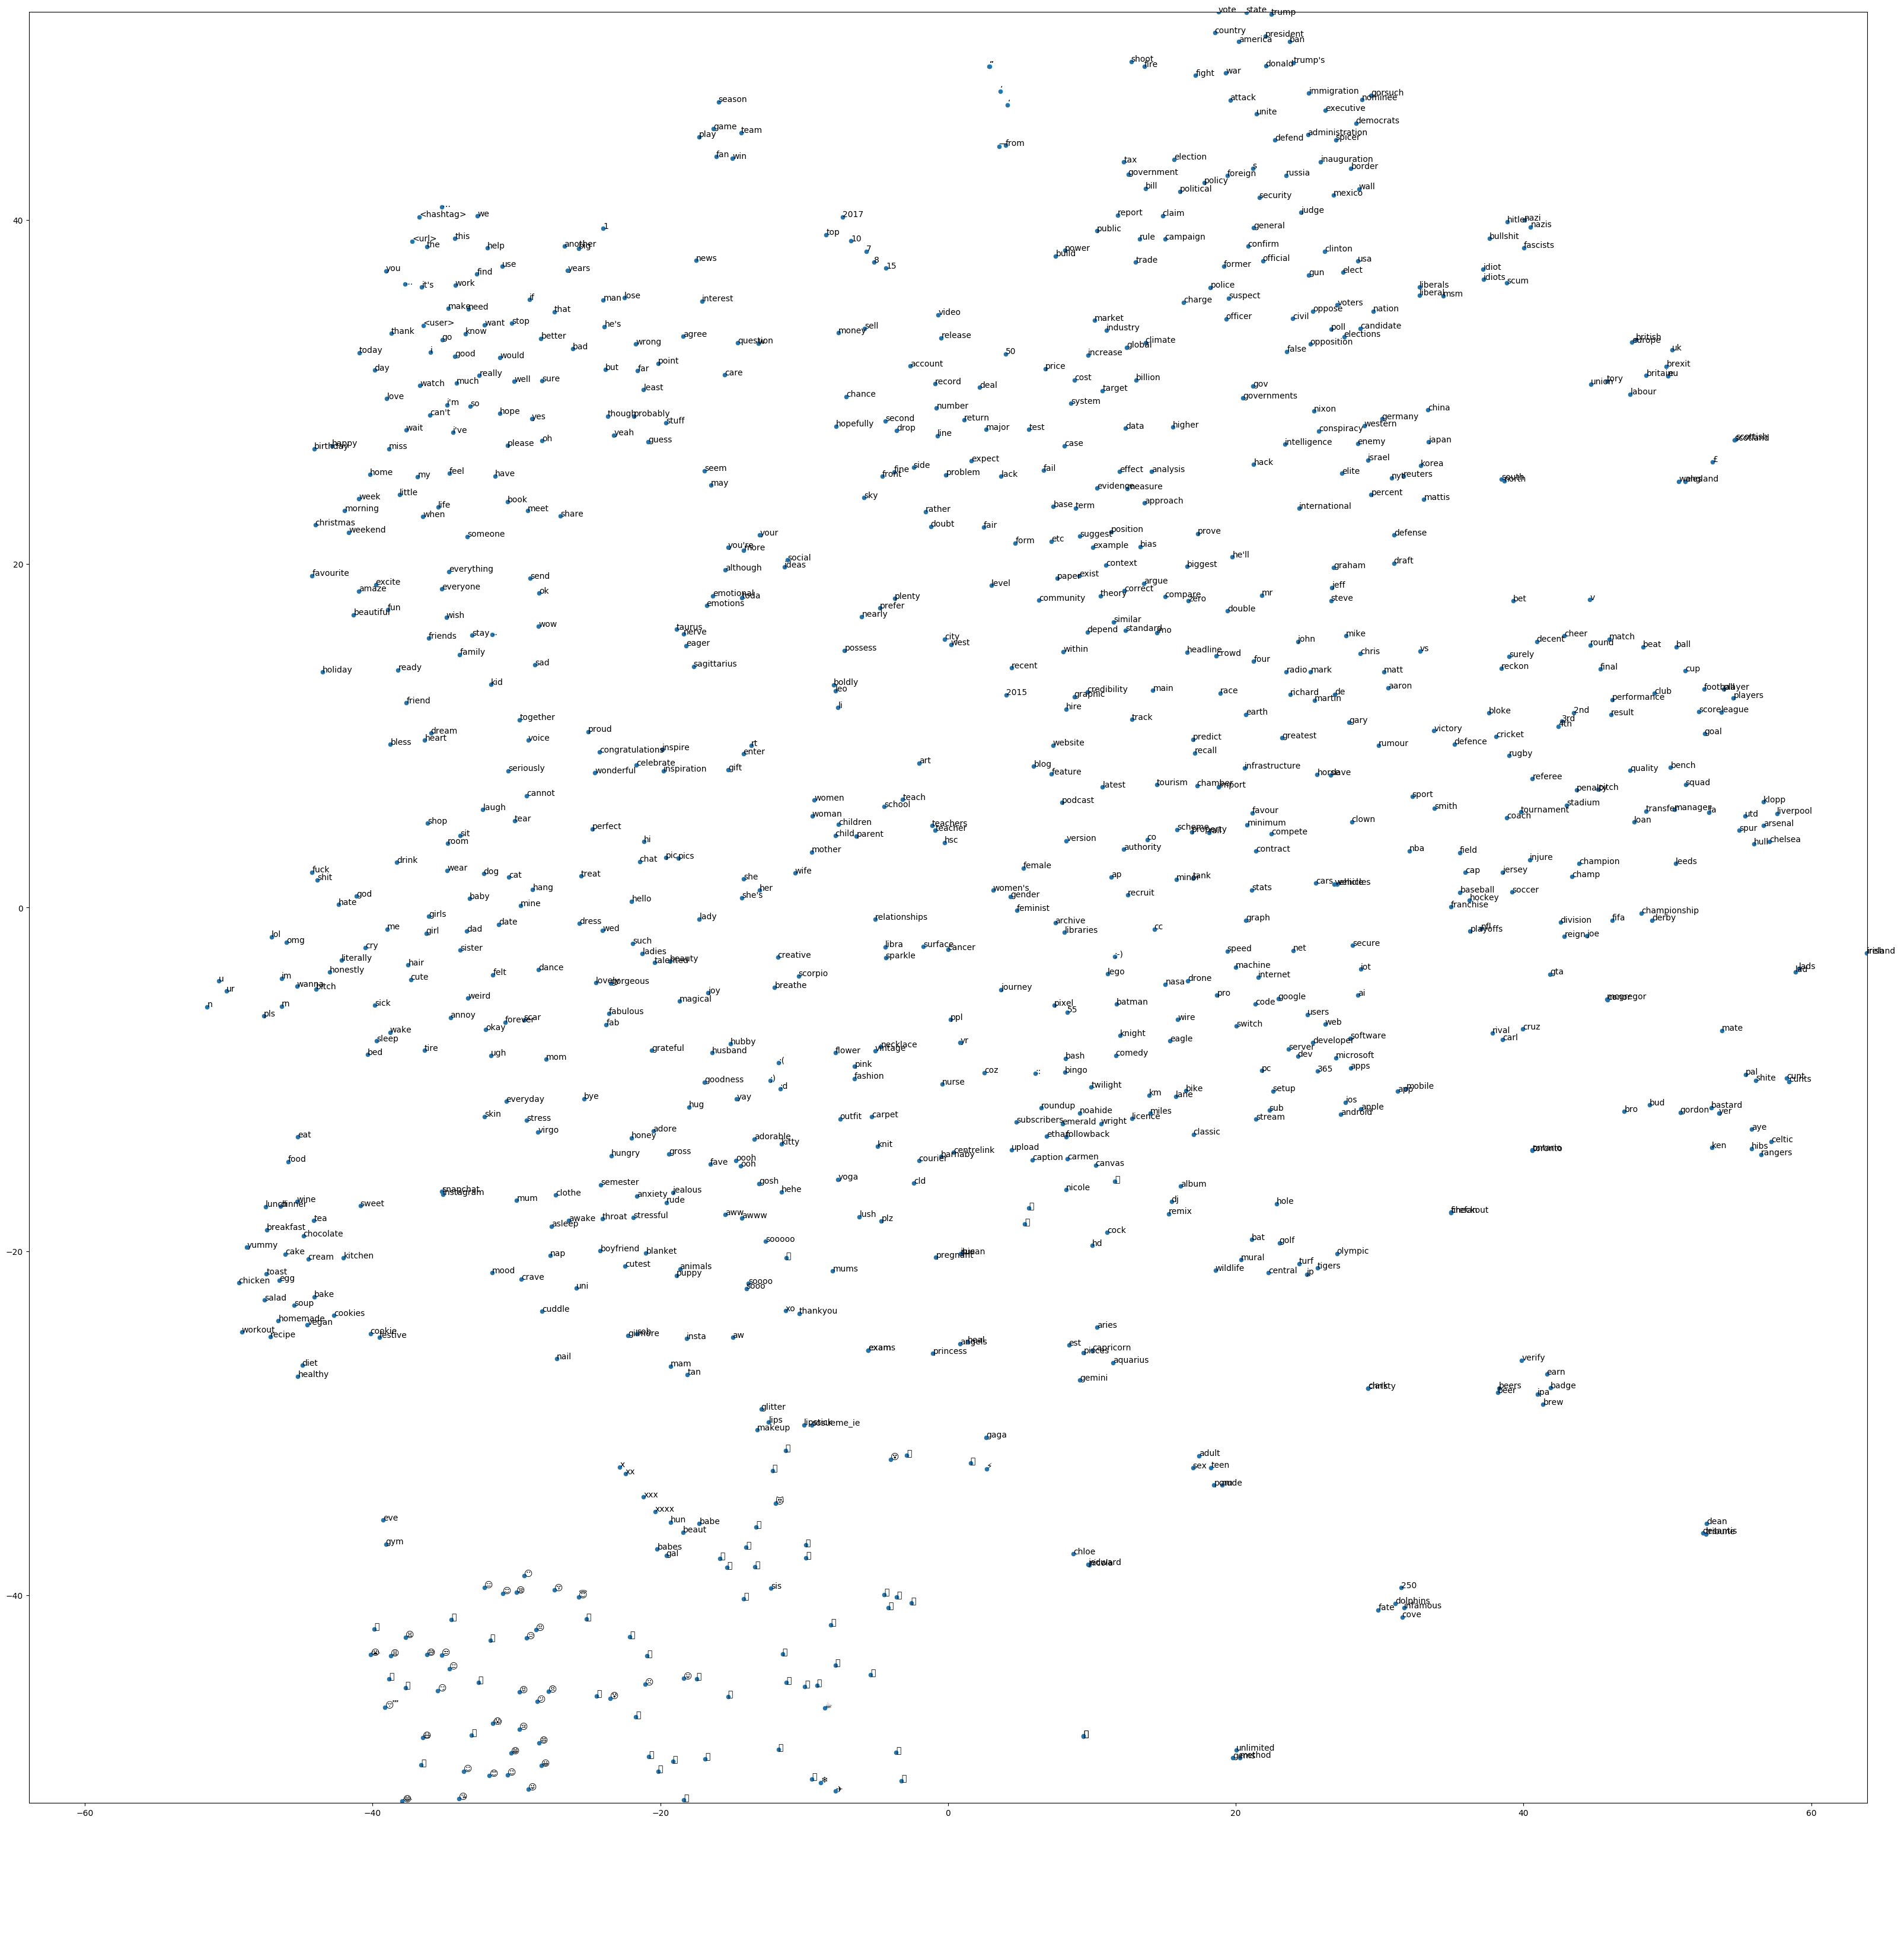

In [0]:
plt.figure(figsize=(40,40), dpi=100); plt.xlim((-max_x,max_x)); plt.ylim((-max_y,max_y))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20);
for i, word in enumerate(words):
    x = reduced_matrix[i, 0]
    y = reduced_matrix[i, 1]
    plt.annotate(word, (x,y))
